In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import seaborn as sns

In [140]:
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [141]:
dataset = df.iloc[:, :-1].values
x = np.empty((150,4), dtype='float')
x = dataset[:,0:4]
y = np.empty((150,1))
y = df.iloc[:,-1].values

for i in range(150):
  if y[i] == 'setosa':
    y[i] = 0
  
  if y[i] == 'versicolor':
    y[i] = 1
  
  if y[i] == 'virginica':
    y[i] = 3


In [142]:
x_centered = np.empty((150,4))
x_centered = x - x.mean(axis=0)

In [143]:
U, s, Vt = np.linalg.svd(x_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]
c3 = Vt.T[:, 2]

In [144]:
W2 = Vt.T[:, :3]
X2D = x_centered.dot(W2)

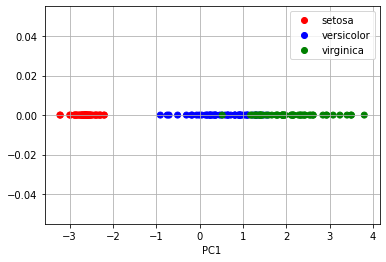

In [145]:
# Creating color map
my_cmap = ListedColormap(['r','b','g'])
classes = ['setosa', 'versicolor', 'virginica']
scatter = plt.scatter(X2D[:,0],np.zeros((150,1)), c=y, cmap=my_cmap)
plt.xlabel('PC1')
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.grid()
plt.show()

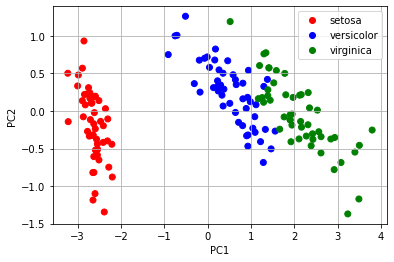

In [146]:
scatter = plt.scatter(X2D[:,0],X2D[:,1], c=y, cmap=my_cmap)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.grid()
plt.show()

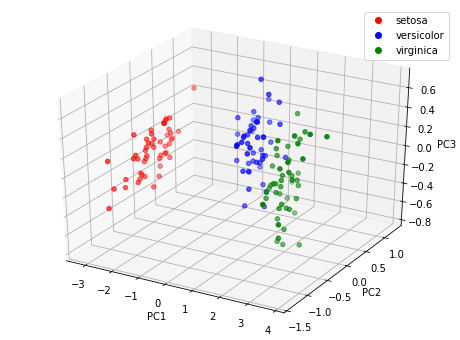

In [147]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection = '3d')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.scatter(X2D[:,0], X2D[:,1], X2D[:,2], c=y, cmap=my_cmap)

plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.grid()
plt.show()

In [148]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pca.fit(x)
X2D_sklearn = pca.transform(x)


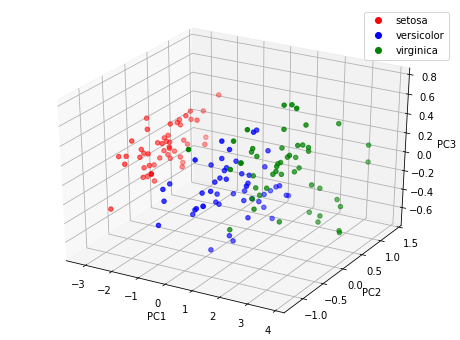

In [149]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection = '3d')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.scatter(X2D_sklearn[:,0], X2D_sklearn[:,1], X2D_sklearn[:,2], c=y, cmap=my_cmap)

plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.grid()
plt.show()

In [150]:
pca.explained_variance_ratio_

array([0.92461621, 0.05301557, 0.01718514])

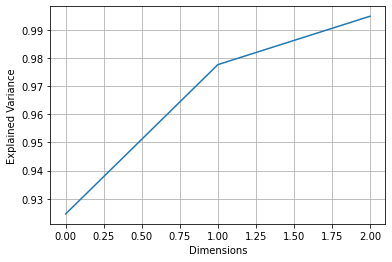

In [156]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)

plt.xlabel('Dimensions')
plt.ylabel('Explained Variance')
plt.grid()
plt.show()